# Garden Project: Exploratory Data Analysis

---

### <p style="color:#87CEEB"> Getting set up</p>

In [1]:
# Import necessary libraries for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from eda_funcs import missing_data_overview, get_col_dtypes

In [2]:
# Settings for viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# Read in csv file
harvesting_data = pd.read_csv('../garden_data/harvest_2020.csv')

<br>

### <p style="color:#87CEEB">Getting familiar with the data</p>

In [11]:
## Harvest data
# Get quick look at data
print(harvesting_data.head(10))

  vegetable                variety        date  weight  units
0   lettuce                 reseed  2020-06-06      20  grams
1    radish       Garden Party Mix  2020-06-06      36  grams
2   lettuce                 reseed  2020-06-08      15  grams
3   lettuce                 reseed  2020-06-09      10  grams
4    radish       Garden Party Mix  2020-06-11      67  grams
5   lettuce  Farmer's Market Blend  2020-06-11      12  grams
6   spinach               Catalina  2020-06-11       9  grams
7     beets                 leaves  2020-06-11       8  grams
8    radish       Garden Party Mix  2020-06-13      53  grams
9   lettuce  Farmer's Market Blend  2020-06-13      19  grams


In [12]:
# Get data shape
print(harvesting_data.shape)

(781, 5)


In [13]:
# Get data types
print(harvesting_data.dtypes)

vegetable    object
variety      object
date         object
weight        int64
units        object
dtype: object


In [14]:
# Check specific data types of columns
get_col_dtypes(harvesting_data)

{'vegetable': str,
 'variety': str,
 'date': str,
 'weight': numpy.int64,
 'units': str}

In [15]:
# Look over missing data
print(missing_data_overview(harvesting_data))


Number of records with at least one missing value:
0

Number of missing values by column:

vegetable    0
variety      0
date         0
weight       0
units        0
dtype: int64
None


In [ ]:
# Note: no missing data for this dataset.

<br>

### <p style="color:#87CEEB"> Preparing and Transforming the data</p>

In [4]:
## Harvesting dataset changes
# Rename columns
harvesting_df = harvesting_data.rename(columns={'vegetable': 'crop'})

# Change data types
harvesting_df['date'] = pd.to_datetime(harvesting_df['date']).dt.date

# No missing values

<br>

### <p style="color:#87CEEB"> Analyzing data characteristics</p>

In [5]:
# Basic statistics
print(harvesting_df.describe())

            weight
count   781.000000
mean    553.463508
std     825.441737
min       2.000000
25%      94.000000
50%     278.000000
75%     659.000000
max    7350.000000


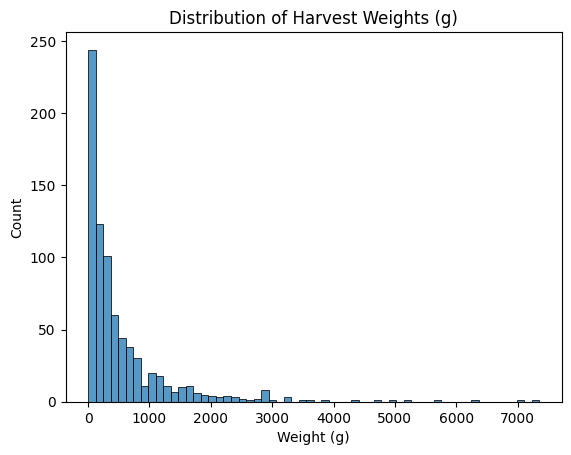

In [6]:
# Histogram of harvest weights
sns.histplot(harvesting_df['weight'])
plt.xlabel('Weight (g)')
plt.ylabel('Count')
plt.title('Distribution of Harvest Weights (g)')

plt.show()

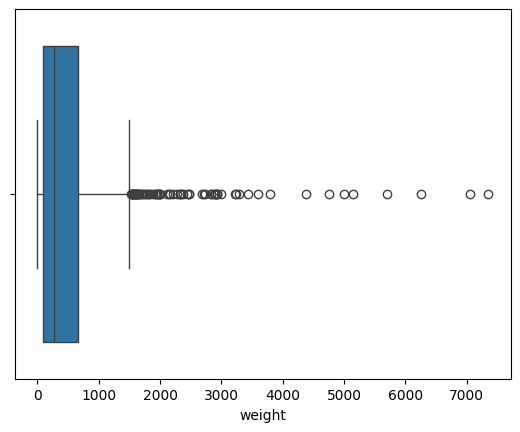

In [7]:
# Boxplot of harvest weights
sns.boxplot(x=harvesting_df['weight'])
plt.show()

In [10]:
# Check harvest weight outliers
outliers_df = harvesting_df[(harvesting_df['weight'] > 1500)]
crop_outliers = outliers_df['crop'].unique()
print(crop_outliers)

['zucchini' 'cucumbers' 'beets' 'corn' 'tomatoes' 'pumpkins' 'squash'
 'edamame' 'potatoes' 'jalapeño' 'rutabaga']


In [14]:
# Get crops with the largest and smallest harvest weights
print(harvesting_df.nsmallest(n=5, columns=['weight']))
print('\n')
print(harvesting_df.nlargest(n=5, columns=['weight']))

         crop        variety        date  weight  units
49   cilantro       cilantro  2020-06-23       2  grams
196     basil  Isle of Naxos  2020-07-24       3  grams
50      basil  Isle of Naxos  2020-06-23       5  grams
176     basil  Isle of Naxos  2020-07-21       7  grams
7       beets         leaves  2020-06-11       8  grams


         crop                variety        date  weight  units
555  pumpkins  Cinderella's Carraige  2020-09-01    7350  grams
649  pumpkins                  saved  2020-09-19    7050  grams
643  pumpkins  Cinderella's Carraige  2020-09-19    6250  grams
754  zucchini              Romanesco  2020-10-15    5700  grams
554    squash           Blue (saved)  2020-09-01    5150  grams


crop       variety              
zucchini   Romanesco                45227
pumpkins   saved                    34896
tomatoes   Amish Paste              29789
           volunteers               23411
pumpkins   New England Sugar        20348
cucumbers  pickling                 19781
squash     Blue (saved)             18835
tomatoes   Better Boy               15426
pumpkins   Cinderella's Carraige    14911
tomatoes   grape                    14694
Name: weight, dtype: int64


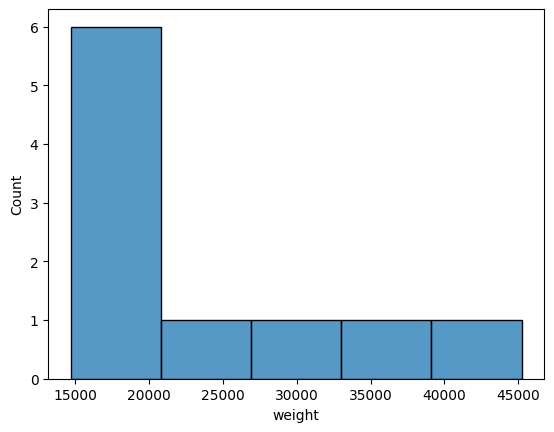

In [34]:
grouped_harvests = harvesting_df.groupby(['crop', 'variety'])
summed_harvests = grouped_harvests['weight'].sum()
sorted_harvests = summed_harvests.sort_values(ascending=False)[:10]

print(sorted_harvests)

sns.histplot(sorted_harvests)
plt.show()

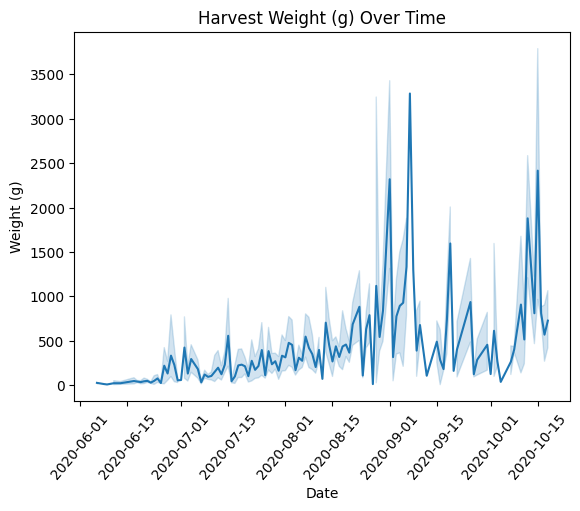

In [22]:
# Plotting harvest weights over time
sns.lineplot(data=harvesting_df, x="date", y="weight")
plt.xlabel('Date')
plt.ylabel('Weight (g)')
plt.title('Harvest Weight (g) Over Time')
plt.xticks(rotation=50)

plt.show()